<a href="https://colab.research.google.com/github/18K41A0247/NLP/blob/main/Assignment_2_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A paragraph is a series of sentences that are organized and coherent, and are all related to a single topic. Almost every piece of writing you do that is longer than a few sentences should be organized into paragraphs. This is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points. Paragraphs can contain many different kinds of information. A paragraph could contain a series of brief examples or a single long illustration of a general point. It might describe a place, character, or process; narrate a series of events; compare or contrast two or more things; classify items into categories; or describe causes and effects. Regardless of the kind of information they contain, all paragraphs share certain characteristics. One of the most important of these is a topic sentence.

# 1. Convert the above paragraph into vectors using:

In [1]:
#i) Word2vec

import nltk
nltk.download('punkt')
from gensim.models import Word2Vec
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
import numpy as np
paragraph = "A paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic.  Almost  every  piece  of  writing  you  do  that  is longer  than  a  few  sentences  should  be  organized  into  paragraphs.  This  is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points.Paragraphs  can  contain  many  different  kinds  of  information.  A  paragraph could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a general  point.  It  might  describe  a  place,  character,  or  process;  narrate  a series of events; compare or contrast two or more things; classify items into categories;  or  describe  causes  and  effects.  Regardless  of  the  kind  of information they contain, all paragraphs share certain characteristics. One of the most important of these is a topic sentence."
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)
sentences = nltk.sent_tokenize(text)
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
for i in range(len(sentences)):
  sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]
model = Word2Vec(sentences, min_count=1)
words = model.wv.vocab
vector = model.wv[words]
np.set_printoptions(threshold=np.inf)
print(vector)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[[ 1.97344064e-03  2.22203694e-03  4.37884917e-03 -3.36987781e-03
  -5.75457059e-04 -5.00287721e-03  3.27677280e-03 -6.52018003e-04
   3.92573699e-03  1.23417319e-03  6.33562799e-04  3.15371522e-04
  -3.31344665e-04 -3.25695868e-03  1.20085210e-03  1.76653254e-03
   4.32403665e-03  2.19471357e-03  4.27607168e-03  1.59016388e-04
   4.61680116e-03  1.55142741e-03  4.98468569e-03  9.70600231e-04
   2.17385986e-03  4.66122665e-03  2.66115158e-03 -3.17836809e-03
   7.17902207e-04  7.59666786e-04 -4.14287526e-04 -4.59101098e-03
   2.67425366e-03 -9.27127141e-04  1.47134659e-03  1.56529248e-04
  -1.52157794e-03 -4.71776444e-03 -2.39654095e-03 -2.05301144e-03
   3.77650675e-03 -3.82874906e-03 -7.43499142e-04 -2.35427846e-03
  -2.07732734e-03  6.97141164e-04 -3.19177331e-03  4.4801

In [4]:
#ii) USE
import tensorflow_hub as hub
import numpy as np
use = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
paragraph = "A paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic.  Almost  every  piece  of  writing  you  do  that  is longer  than  a  few  sentences  should  be  organized  into  paragraphs.  This  is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points.Paragraphs  can  contain  many  different  kinds  of  information.  A  paragraph could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a general  point.  It  might  describe  a  place,  character,  or  process;  narrate  a series of events; compare or contrast two or more things; classify items into categories;  or  describe  causes  and  effects.  Regardless  of  the  kind  of information they contain, all paragraphs share certain characteristics. One of the most important of these is a topic sentence."
sentence = []
r = paragraph.split('?')
for i in r:
  sentence.extend(i.split("."))
emb = use(sentence)
np.set_printoptions(threshold=np.inf)
print(emb)

INFO:absl:Using /tmp/tfhub_modules to cache modules.


tf.Tensor(
[[ 1.16849560e-02 -3.06057017e-02  6.11633621e-02  8.47723708e-02
  -5.83404489e-03  2.84163468e-03  2.59479191e-02  3.90258408e-03
  -5.55585772e-02  5.68110794e-02 -8.95015243e-03 -4.50466387e-03
  -6.06310442e-02  3.18566710e-02 -6.86047748e-02 -9.39451531e-02
  -4.23613824e-02  3.93056907e-02 -9.02280435e-02 -5.53664006e-02
  -1.92775275e-03  5.99910133e-02  9.42121632e-03  6.07980192e-02
  -5.22601139e-03  1.28727444e-02 -2.15456896e-02 -4.93353941e-02
  -6.26435649e-05 -4.05308716e-02  7.90261030e-02 -5.32253878e-03
  -2.70436448e-03 -1.01282923e-02 -6.41689077e-02  2.35940833e-02
   4.94742952e-02  1.76912267e-02 -7.69225741e-03  2.03442983e-02
   1.55387660e-02  4.64376099e-02  3.61865498e-02  4.38465402e-02
   6.95741177e-02  2.37604082e-02 -1.20333314e-03 -4.55583967e-02
  -3.44719328e-02  1.63743850e-02 -2.70779827e-03  5.60244247e-02
   4.04605584e-04 -1.96648687e-02 -3.91405188e-02 -9.61556751e-03
   2.14329711e-03  5.61526865e-02  2.82766894e-02  1.80720370e-02

In [1]:
#iii)ELMO
import tensorflow_hub as hub
import tensorflow.compat.v1 as tf

tf.disable_eager_execution()
elmo = hub.Module('https://tfhub.dev/google/elmo/3', trainable=True)
paragraph = "A paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic.  Almost  every  piece  of  writing  you  do  that  is longer  than  a  few  sentences  should  be  organized  into  paragraphs.  This  is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points.Paragraphs  can  contain  many  different  kinds  of  information.  A  paragraph could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a general  point.  It  might  describe  a  place,  character,  or  process;  narrate  a series of events; compare or contrast two or more things; classify items into categories;  or  describe  causes  and  effects.  Regardless  of  the  kind  of information they contain, all paragraphs share certain characteristics. One of the most important of these is a topic sentence."
sentence = []
r = paragraph.split('?')
for i in r:
  sentence.extend(i.split("."))
emb = elmo(sentence, signature="default", as_dict=True)["elmo"]
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(emb))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


[[[ 0.29286996 -0.14378002 -0.32574052 ... -0.38884428 -0.38170397
   -0.04690397]
  [-0.59441644  0.09640661  0.50537676 ...  0.22688475  0.20622446
    0.49345496]
  [-0.17083307 -0.18744141 -0.27626717 ... -0.6978538   0.19750006
    0.66995096]
  ...
  [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
   -0.01650422]
  [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
   -0.01650422]
  [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
   -0.01650422]]

 [[ 0.3972121  -0.15091433  0.5870079  ... -0.4369943  -0.44912606
    0.15666597]
  [ 0.2227458  -0.12839283  0.01303119 ... -0.5313667  -0.64940464
    0.03011321]
  [-0.6277796  -0.4548951   0.9650204  ... -0.73191273  0.25971276
    0.19430715]
  ...
  [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
   -0.01650422]
  [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
   -0.01650422]
  [-0.02840841 -0.04353216  0.04130163 ...  0.02583168 -0.01429836
   -0.

In [1]:
#iv) GP2
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

paragraph = "A paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic.  Almost  every  piece  of  writing  you  do  that  is longer  than  a  few  sentences  should  be  organized  into  paragraphs.  This  is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points.Paragraphs  can  contain  many  different  kinds  of  information.  A  paragraph could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a general  point.  It  might  describe  a  place,  character,  or  process;  narrate  a series of events; compare or contrast two or more things; classify items into categories;  or  describe  causes  and  effects.  Regardless  of  the  kind  of information they contain, all paragraphs share certain characteristics. One of the most important of these is a topic sentence."
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-large')
model = GPT2LMHeadModel.from_pretrained('gpt2-large')
emb=tokenizer.encode(paragraph,add_special_tokens=False,return_tensors="pt")
print(emb)

tensor([[   32,  7322,   318,   257,  2168,   286, 13439,   326,   389,  8389,
           290, 24870,    11,   290,   389,   477,   220,  3519,   220,   284,
           220,   257,   220,  2060,   220,  7243,    13,   220, 16699,   220,
           790,   220,  3704,   220,   286,   220,  3597,   220,   345,   220,
           466,   220,   326,   220,   318,  2392,   220,   621,   220,   257,
           220,  1178,   220, 13439,   220,   815,   220,   307,   220,  8389,
           220,   656,   220, 23549,    13,   220,   770,   220,   318,   780,
         23549,   905,   257,  9173,   810,   262, 45944,  3279,   286,   281,
         14268,  2221,   290,   886,    11,   290,  4145,  1037,   262,  9173,
           766,   262,  4009,   286,   262, 14268,   290, 13180,   663,  1388,
          2173,    13, 10044,  6111,    82,   220,   460,   220,  3994,   220,
           867,   220,  1180,   220,  6982,   220,   286,   220,  1321,    13,
           220,   317,   220,  7322,   714,   220,  

In [6]:
#v) Sentence-BERT
from sentence_transformers import SentenceTransformer
import numpy as np

paragraph = "A paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic.  Almost  every  piece  of  writing  you  do  that  is longer  than  a  few  sentences  should  be  organized  into  paragraphs.  This  is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points.Paragraphs  can  contain  many  different  kinds  of  information.  A  paragraph could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a general  point.  It  might  describe  a  place,  character,  or  process;  narrate  a series of events; compare or contrast two or more things; classify items into categories;  or  describe  causes  and  effects.  Regardless  of  the  kind  of information they contain, all paragraphs share certain characteristics. One of the most important of these is a topic sentence."
model = SentenceTransformer('bert-base-nli-mean-tokens')
sentence_embeddings = model.encode(sentence)
np.set_printoptions(threshold=np.inf)
print(sentence_embeddings)

[[-8.12816620e-02  2.75614440e-01  9.23906982e-01  5.75636506e-01
   7.07169026e-02 -8.68875146e-01 -1.75419971e-01  3.29193205e-01
  -1.02589980e-01 -3.63505810e-01 -7.88604915e-01  2.31386676e-01
  -2.10172981e-01  3.05374861e-01  5.23381352e-01  1.24605551e-01
  -1.63338855e-01 -5.38477182e-01  5.78041852e-01 -4.05865461e-01
  -2.37038493e-01  2.13041782e-01 -1.11681151e+00 -1.26070690e+00
   4.40897167e-01 -5.84049463e-01  4.45301235e-01 -7.32816100e-01
  -4.04006541e-01  3.96186173e-01 -4.80741262e-02 -3.10713258e-02
   9.89503384e-01 -6.17248595e-01  4.62994039e-01  5.25270820e-01
   9.05109882e-01  7.65184343e-01  1.15975693e-01 -6.41422749e-01
   1.48077655e+00  1.12613969e-01  3.79340351e-01 -4.34628457e-01
  -5.81318736e-01 -3.97251099e-01 -4.76212949e-01  2.71145016e-01
  -5.33487916e-01  1.86152622e-01 -9.83803689e-01 -3.94816518e-01
   5.68559289e-01  2.16808707e-01 -5.81877530e-01  8.27664673e-01
   2.24557042e-01 -9.10842061e-01  1.86585635e-01 -7.91194737e-02
  -3.59095

# 2. Find named entities (NER) for the above paragraph?

In [7]:
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")
paragraph = "A paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic.  Almost  every  piece  of  writing  you  do  that  is longer  than  a  few  sentences  should  be  organized  into  paragraphs.  This  is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points.Paragraphs  can  contain  many  different  kinds  of  information.  A  paragraph could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a general  point.  It  might  describe  a  place,  character,  or  process;  narrate  a series of events; compare or contrast two or more things; classify items into categories;  or  describe  causes  and  effects.  Regardless  of  the  kind  of information they contain, all paragraphs share certain characteristics. One of the most important of these is a topic sentence."
text1= NER(paragraph)
for word in text1.ents:
    print(word.text,word.label_)
displacy.render(text1,style="ent",jupyter=True)

two CARDINAL
One CARDINAL


# 3. Find similar sentences(repeated sentences) from the above paragraph?

In [8]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer('bert-base-nli-mean-tokens')
paragraph = "A paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic.  Almost  every  piece  of  writing  you  do  that  is longer  than  a  few  sentences  should  be  organized  into  paragraphs.  This  is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points.Paragraphs  can  contain  many  different  kinds  of  information.  A  paragraph could  contain  a  series  of  brief  examples  or  a  single  long  illustration  of  a general  point.  It  might  describe  a  place,  character,  or  process;  narrate  a series of events; compare or contrast two or more things; classify items into categories;  or  describe  causes  and  effects.  Regardless  of  the  kind  of information they contain, all paragraphs share certain characteristics. One of the most important of these is a topic sentence."
sentence = []
r = paragraph.split('?')
for i in r:
  sentence.extend(i.split("."))
se_embeddings = model.encode(sentence)
q1_vec= model.encode(sentence[0])
def cosine(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

for sent in sentence:
  similarity = cosine(q1_vec, model.encode([sent])[0])
  if similarity.any()>0.6:
    print("Sentence1 =",sentence[0],"\n \nSentence2 =", sent, "\n\nsimilarity = ", similarity,end="\n\n")

Sentence1 = A paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic 
 
Sentence2 = A paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic 

similarity =  0.99999994

Sentence1 = A paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic 
 
Sentence2 =   Almost  every  piece  of  writing  you  do  that  is longer  than  a  few  sentences  should  be  organized  into  paragraphs 

similarity =  0.65571684

Sentence1 = A paragraph is a series of sentences that are organized and coherent, and are all  related  to  a  single  topic 
 
Sentence2 =   This  is because paragraphs show a reader where the subdivisions of an essay begin and end, and thus help the reader see the organization of the essay and grasp its main points 

similarity =  0.5188804

Sentence1 = A paragraph is a series of sentences that are organized and coher

# 4). Explain POS tagging with HMM?

4) Explain POS tagging with HMM?

Parts of Speech Tagging (POS): It is a process of converting a sentence to forms – list of words, list of tuples (where each tuple is having a form (word, tag)). The tag in case of is a part-of-speech tag, and signifies whether the word is a noun, adjective, verb, and so on. reading a sentence and being able to identify what words act as nouns, pronouns, verbs, adverbs, and so on. All these are referred to as the part of speech tags.   According to Wikipedia, part-of-speech tagging (POS tagging or PoS tagging or POST), also called grammatical tagging or word-category disambiguation, is the process of marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context i.e. its relationship with adjacent and related words in a phrase, sentence, or paragraph.

> Indented block

> Indented block





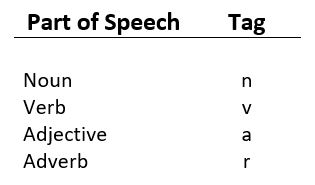
Default tagging is a basic step for the part-of-speech tagging. It is performed using the DefaultTagger class. The DefaultTagger class takes ‘tag’ as a single argument. NN is the tag for a singular noun. DefaultTagger is most useful when it gets to work with most common part-of-speech tag. that’s why a noun tag is recommended.

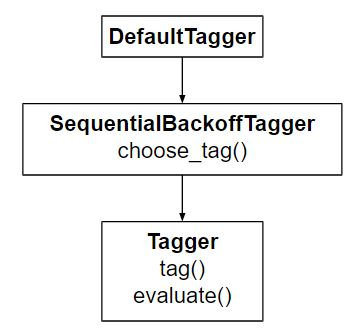
POS tagging with Hidden Markov Model :- HMM (Hidden Markov Model) is a Stochastic technique for POS tagging. Hidden Markov models are known for their applications to reinforcement learning and temporal pattern recognition such as speech, handwriting, gesture recognition, musical score following, partial discharges, and bioinformatics.

Let us consider an example proposed by Dr.Luis Serrano and find out how HMM selects an appropriate tag sequence for a sentence.

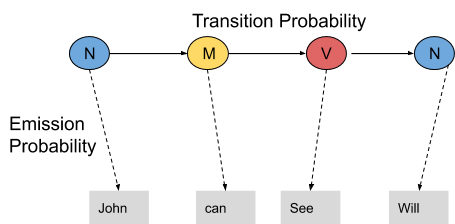
In this example, we consider only 3 POS tags that are noun, model and verb. Let the sentence “ Ted will spot Will ” be tagged as noun, model, verb and a noun and to calculate the probability associated with this particular sequence of tags we require their Transition probability and Emission probability.

The transition probability is the likelihood of a particular sequence for example, how likely is that a noun is followed by a model and a model by a verb and a verb by a noun. This probability is known as Transition probability. It should be high for a particular sequence to be correct.

Now, what is the probability that the word Ted is a noun, will is a model, spot is a verb and Will is a noun. These sets of probabilities are Emission probabilities and should be high for our tagging to be likely.

Let us calculate the above two probabilities for the set of sentences below

Mary Jane can see Will Spot will see Mary Will Jane spot Mary? Mary will pat Spot Note that Mary Jane, Spot, and Will are all names.
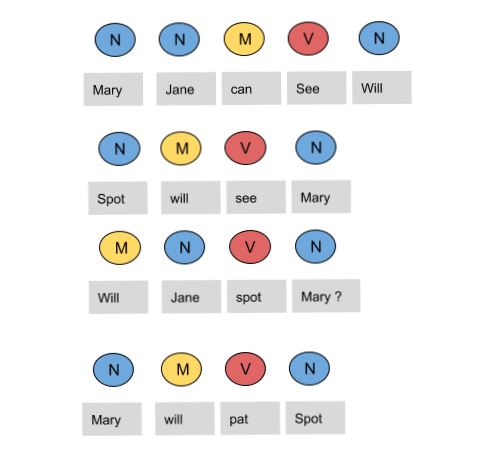
In the above sentences, the word Mary appears four times as a noun. and see appears two times as a verb. we need to calculate the probabilitiy of a word appearing as noun, verb or model. to do this, we need to calculate the emission probabilities, which represented using below table.

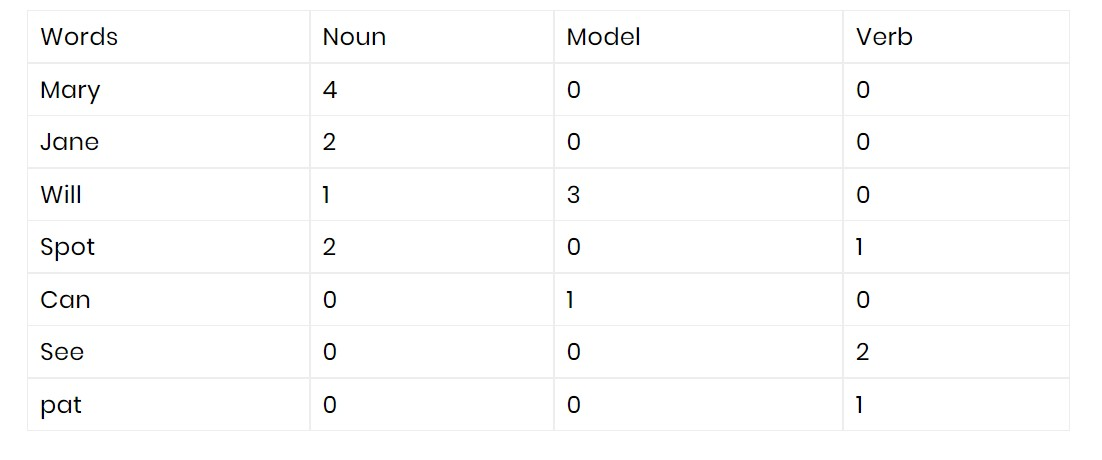
Now divide each column by the total number of their appearances .for example, ‘noun’ appears nine times in the above sentences, so divide each term by 9 in the noun column. and repeat the same for all remaining processes. We get the following table after this operation. 
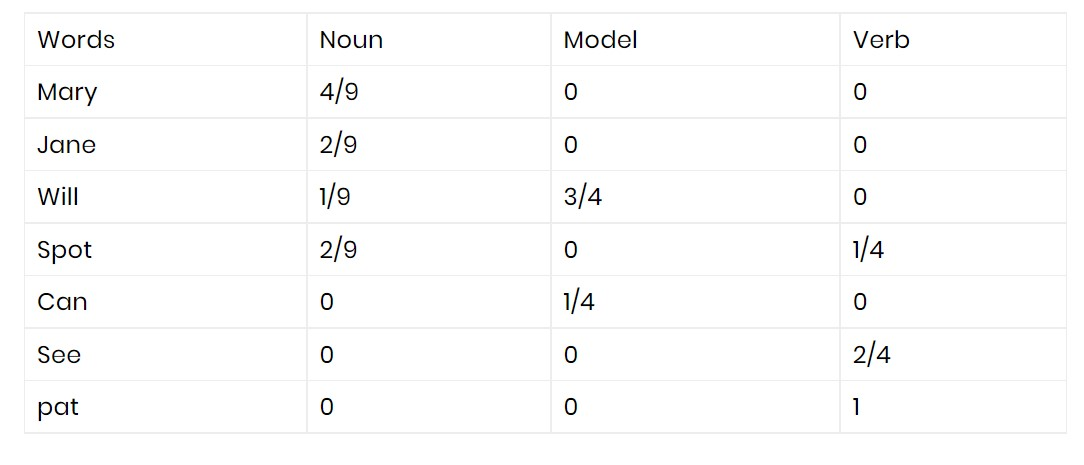
From the above table, we can conclude that

The probability that Mary is Noun = 4/9

The probability that Mary is Model = 0

The probability that Mary is Verb = 0

The probability that Will is Noun = 1/9

The probability that Will is Model = 3/4

In a similar manner, we can analyze rest of the probabilities. These are the emission probabilities.

Next, we have to calculate the transition probabilities, so define two more tags < S > and < E >. < S > is placed at the beginning of each sentence and < E > at the end as shown in the figure below.

since for first and last word there is no previous and next words, so we are adding extra dummy words. i.e < E > and < S > 
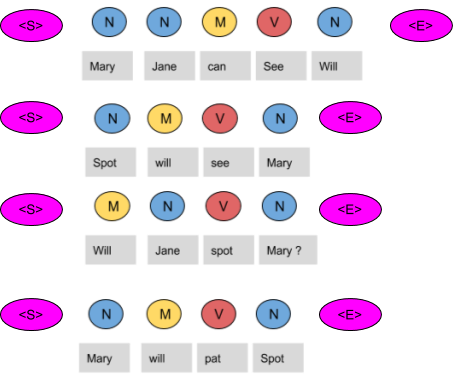
now we need to create a table and fill it with the co-occurrence counts of the tags. 
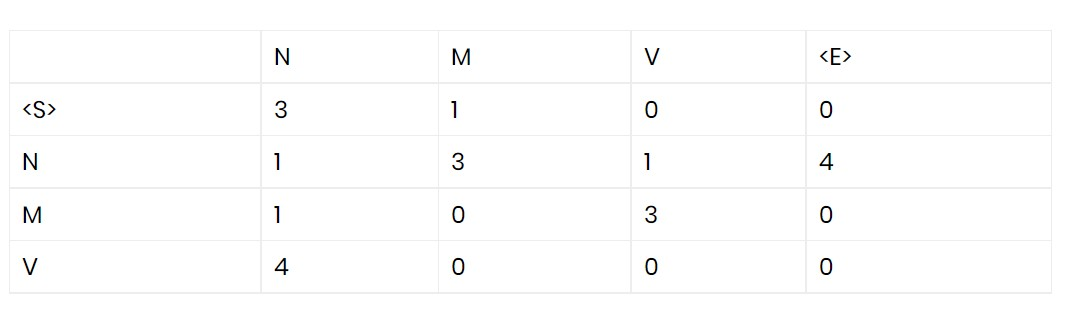
In the above figure, we can see that the < S > tag is followed by the N tag three times, thus the first entry is 3.The model tag follows the < S > just once, thus the second entry is 1. In a similar manner, the rest of the table is filled.

Next, we divide each term in a row of the table by the total number of co-occurrences of the tag in consideration, for example, The Model tag is followed by any other tags four times (in total) as shown below, thus we divide each element in the third row by four.

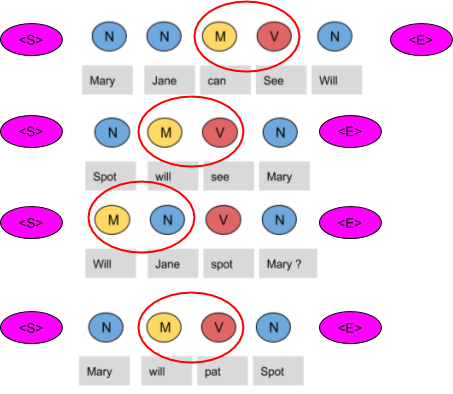
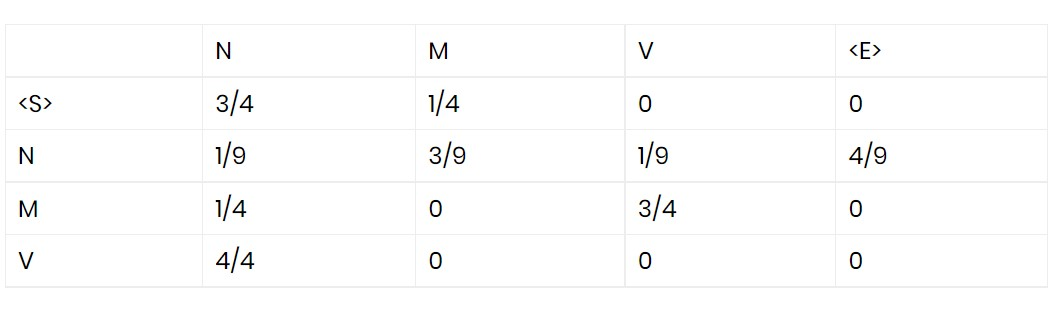
These are the respective transition probabilities for the above four sentences.

how does the HMM determine the appropriate sequence of tags for a particular sentence from the above tables? Let us find it out.

Take a new sentence and tag them with wrong tags. Let the sentence, ‘ Will can spot Mary’ be tagged as-

Will as a model Can as a verb Spot as a noun Mary as a noun Now calculate the probability of this sequence being correct in the following manner. 
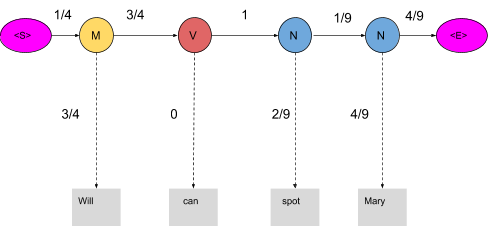
The probability of the tag Model (M) comes after the tag is ¼ as seen in the table. Also, the probability that the word Will is a Model is 3/4. In the same manner, we calculate each and every probability in the graph. Now the product of these probabilities is the likelihood that this sequence is right. Since the tags are not correct, the product is zero.

1/43/43/4012/91/94/94/9=0

When these words are correctly tagged, we get a probability greater than zero as shown below

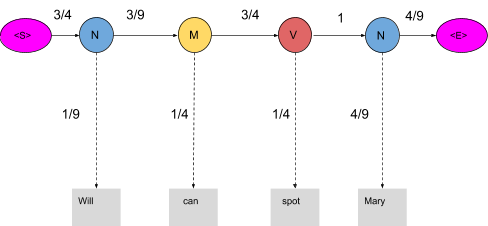
Calculating the product of these terms we get,

3/41/93/91/43/41/414/94/9=0.00025720164

For our example, keeping into consideration just three POS tags we have mentioned, 81 different combinations of tags can be formed. In this case, calculating the probabilities of all 81 combinations seems achievable. But when the task is to tag a larger sentence and all the POS tags in the Penn Treebank project are taken into consideration, the number of possible combinations grows exponentially and this task seems impossible to achieve. Now let us visualize these 81 combinations as paths and using the transition and emission probability mark each vertex and edge as shown below.

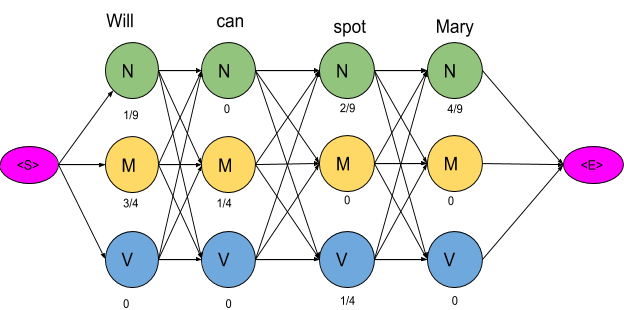
The next step is to delete all the vertices and edges with probability zero, also the vertices which do not lead to the endpoint are removed. Also, we will mention-
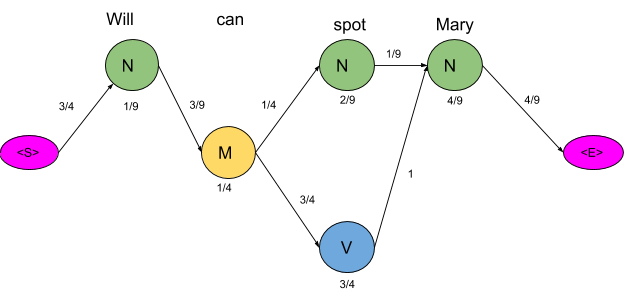
Now there are only two paths that lead to the end, let us calculate the probability associated with each path.

s→N→M→N→N→ E =3/41/93/91/41/42/91/94/94/9=0.00000846754

s→N→M→N→V→E=3/41/93/91/43/41/414/94/9=0.00025720164

Clearly, the probability of the second sequence is much higher and hence the HMM is going to tag each word in the sentence according to this sequence.